<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Importing Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Loading the data

In [3]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_data.shape

(4324, 9)

#### Data has 4324 rows and 9 columns

In [5]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [6]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [7]:
df_data.isna().to_numpy().sum()

3360

In [8]:
df_data[df_data.isna().any(axis=1)]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [9]:
df_data[df_data.duplicated()]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status


#### <div style="color: orange;">3360 Rows contain NaN values in price columns</div>
#### <div style="color: green;">No Duplicated data</div>

#### Checking if all NaN values are in price columns

In [10]:
df_data[df_data.Price.isna()]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


#### So all the NaN values are in price column -- confirmed

# <div style="color: orange"><b> Section 02 </b></div>
## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [11]:
# Dropping first 2 columns
df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [12]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# <div style="color: orange"><b> Section 03 </b></div>
## Descriptive Statistics

In [13]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [14]:
# Checking if all the date time contain utc
df_data['Date'] = df_data[df_data.Date.str.contains(
    'UTC')].Date.str.removesuffix(' UTC')

In [15]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [16]:
# Convert columns into correct data types
df_data['Date'] = pd.to_datetime(df_data['Date'])
df_data['Price'] = df_data['Price'].str.replace(",", "").astype('float64')
df_data.dtypes

Organisation              object
Location                  object
Date              datetime64[ns]
Detail                    object
Rocket_Status             object
Price                    float64
Mission_Status            object
dtype: object

In [17]:
df_data['Organisation'] = df_data['Organisation'].convert_dtypes()
df_data["Location"] = df_data["Location"].convert_dtypes()
df_data["Detail"] = df_data["Detail"].convert_dtypes()
df_data["Rocket_Status"] = df_data["Rocket_Status"].convert_dtypes()
df_data["Mission_Status"] = df_data["Mission_Status"].convert_dtypes()
df_data.dtypes

Organisation      string[python]
Location          string[python]
Date              datetime64[ns]
Detail            string[python]
Rocket_Status     string[python]
Price                    float64
Mission_Status    string[python]
dtype: object

In [18]:
# convert to categorical data if possible
df_data['Organisation'] = df_data['Organisation'].astype('category')
df_data['Location'] = df_data['Location'].astype('category')
df_data['Detail'] = df_data['Detail'].astype('category')
df_data['Rocket_Status'] = df_data['Rocket_Status'].astype('category')
df_data['Mission_Status'] = df_data['Mission_Status'].astype('category')
df_data.dtypes

Organisation            category
Location                category
Date              datetime64[ns]
Detail                  category
Rocket_Status           category
Price                    float64
Mission_Status          category
dtype: object

In [19]:
df_data.aggregate(['count', 'nunique'])

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4198,4324,4324,964,4324
nunique,56,137,4194,4278,2,56,4


In [20]:
df_data['Mission_Status'].unique()

['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure']
Categories (4, string): [Failure, Partial Failure, Prelaunch Failure, Success]

# <div style="color: orange"><b> Section 03 </b></div>
## Number of Launches per Company

#### Create a chart that shows the number of space mission launches by organisation.

In [21]:
launches = df_data['Organisation'].value_counts()

In [22]:
launches_bar = px.bar(x=launches.index, y=launches.values,
                      title='Launches by Organisation')
launches_bar.update_layout(xaxis_title='Organisation', yaxis_title='Launches')
launches_bar.show()

In [23]:
launches = launches[:20]
launches_bar = px.bar(x=launches.index, y=launches.values,
                      title='Launches by Organisation')
launches_bar.update_layout(xaxis_title='Organisation', yaxis_title='Launches')
launches_bar.show()
launches_bar.update_yaxes(type="log")
launches_bar.show()

In [25]:
launches = launches[:10]
launches_pie = px.pie(launches, values=launches.values,
                      names=launches.index, title='Launches by Organisation')
launches_pie.update_traces(textposition='outside', textinfo='percent+label')
launches_pie.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [29]:
rocket_status = df_data['Rocket_Status'].value_counts()

In [30]:
rocket_status_pie = px.pie(values=rocket_status.values,
                           names=rocket_status.index, title='Rocket Status')
rocket_status_pie.update_traces(
    textposition='outside', textinfo='percent+label')
rocket_status_pie.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [32]:
mission_status = df_data['Mission_Status'].value_counts()
mission_status

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [33]:
mission_status_pie = px.pie(
    values=mission_status.values, names=mission_status.index, title='Mission Status')
mission_status_pie.update_traces(
    textposition='outside', textinfo='percent+label')
mission_status_pie.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [39]:
price_distribution = df_data[df_data['Price'].isna() == False].Price

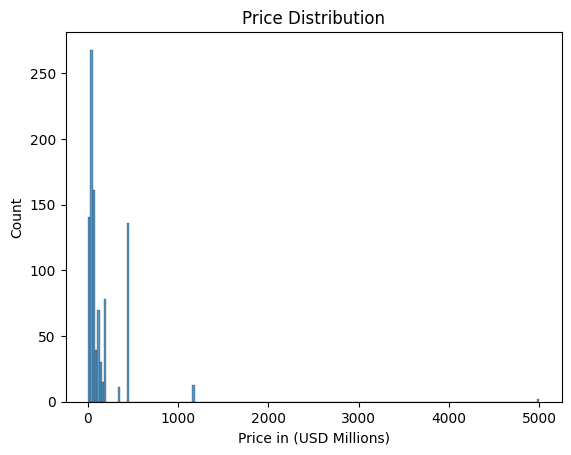

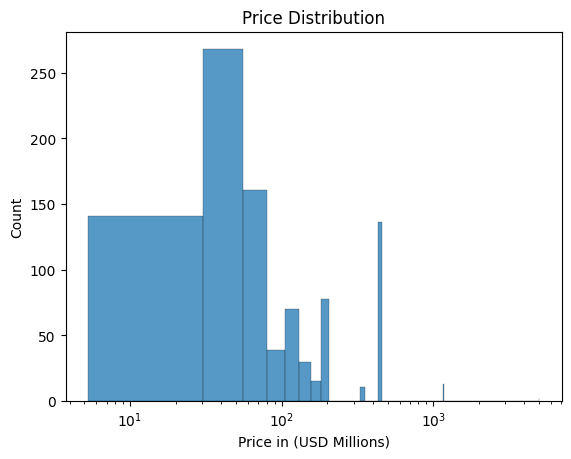

In [47]:
plt.figure()
sns.histplot(price_distribution)
plt.title('Price Distribution')
plt.xlabel('Price in (USD Millions)')
plt.show()
plt.figure()
sns.histplot(price_distribution)
plt.title('Price Distribution')
plt.xlabel('Price in (USD Millions)')
plt.semilogx()
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [66]:
df_data['Country'] = df_data['Location'].str.split(',').str[-1].str.strip()
df_data['Country'] = df_data['Country'].convert_dtypes().astype('category')
df_data['Country'] = df_data['Country'].replace('Russia', 'Russian Federation')
df_data['Country'] = df_data['Country'].replace('New Mexico', 'USA')
df_data['Country'] = df_data['Country'].replace(
    'Pacific Missile Range Facility', 'USA')
df_data['Country'] = df_data['Country'].replace('Yellow Sea', 'China')
df_data['Country'] = df_data['Country'].replace(
    'Shahrud Missile Test Site', 'Iran')
df_data['Country'] = df_data['Country'].replace('Gran Canaria', 'USA')
df_data['Country'] = df_data['Country'].replace(
    'Barents Sea', 'Russian Federation')
df_data['Country'] = df_data['Country'].replace('Pacific Ocean', 'USA')

df_data['Country'].value_counts()

Country
Russian Federation    1398
USA                   1387
Kazakhstan             701
France                 303
China                  269
Japan                  126
India                   76
Iran                    14
New Zealand             13
Israel                  11
Kenya                    9
Australia                6
North Korea              5
Brazil                   3
South Korea              3
Name: count, dtype: int64

In [69]:
def get_alpha3(country):
    try:
        if country == 'Iran':
            return 'IRN'
        if country == 'North Korea':
            return 'PRK'
        if country == 'South Korea':
            return 'KOR'
        return countries.get(country).alpha3
    except KeyError as e:
        return e


df_data['Country_Code'] = df_data['Country'].apply(
    lambda x: get_alpha3(x) if x != 'Iran' else 'IRN')

In [70]:
df_data['Country_Code'].value_counts()

Country_Code
RUS    1398
USA    1387
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
BRA       3
KOR       3
Name: count, dtype: int64

# Use a Choropleth Map to Show the Number of Failures by Country


In [71]:
geojson = px.data.gapminder().query("year==2007")
geojson

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.83,31889923,974.58,AFG,4
23,Albania,Europe,2007,76.42,3600523,"5,937.03",ALB,8
35,Algeria,Africa,2007,72.30,33333216,"6,223.37",DZA,12
47,Angola,Africa,2007,42.73,12420476,"4,797.23",AGO,24
59,Argentina,Americas,2007,75.32,40301927,"12,779.38",ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.25,85262356,"2,441.58",VNM,704
1667,West Bank and Gaza,Asia,2007,73.42,4018332,"3,025.35",PSE,275
1679,"Yemen, Rep.",Asia,2007,62.70,22211743,"2,280.77",YEM,887
1691,Zambia,Africa,2007,42.38,11746035,"1,271.21",ZMB,894


In [80]:
number_of_failures = df_data[df_data['Mission_Status']
                             == 'Failure'].groupby('Country').count().reset_index()
number_of_failures = number_of_failures[['Country', 'Mission_Status']]
number_of_failures["ISO"] = number_of_failures['Country'].apply(
    lambda x: get_alpha3(x))
number_of_failures

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22364\1069260262.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Country,Mission_Status,ISO
0,Australia,3,AUS
1,Brazil,2,BRA
2,China,19,CHN
3,France,13,FRA
4,India,8,IND
5,Iran,8,IRN
6,Israel,2,ISR
7,Japan,10,JPN
8,Kazakhstan,72,KAZ
9,Kenya,0,KEN


In [86]:

world_map = px.choropleth(number_of_failures, locations='ISO', color='Country', hover_name='Country', projection='mercator',
                          color_continuous_scale=px.colors.sequential.matter, width=1500, height=900, title='Number of Failures by Country')
world_map.show()

d:\PersonalProjects\Portfolio_18_Analyse_Space_Race\.venv\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

